# IMPORTS

/bin/bash: transformers-cli: command not found


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.3MB 31.5MB/s 
     |████████████████████████████████| 3.3MB 47.6MB/s 
     |████████████████████████████████| 901kB 47.7MB/s 


In [ ]:
!transformers-cli login

2021-06-03 16:19:17.344044: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        
Username: MoaazZaki
Password: 
Login successful
Your token: OEqtkNwiXTsyXBcunOOSaEGLcvnIjkIxacSmiMADDfrdNAPcMeQokvypgzUbwiZQWrhCuaQyHPkEqkglbwjGPyqpePosUGDgfkCPPktBGKXxfTCDBnkEfkcREhEnZigG 

Your token has been saved to /root/.huggingface/token


In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 31.4MB/s 


In [ ]:
!pip install demoji
import demoji
demoji.download_codes()

... OK (Got response in 0.13 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK


In [ ]:
!pip install pyarabic

     |████████████████████████████████| 112kB 25.4MB/s 
  Created wheel for pyarabic: filename=PyArabic-0.6.10-cp37-none-any.whl size=113324 sha256=49ed272115297577ff8bf1228f223233a9e2c62e1debeca22ebb751cc720ccde
  Stored in directory: /root/.cache/pip/wheels/10/b8/f5/b7c1a50e6efb83544844f165a9b134afe7292585465e29b61d
Successfully built pyarabic


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Assesting libraries
import numpy as np
import pandas as pd
import re

#from pyarabic import araby
from keras.preprocessing.sequence import pad_sequences
from snowballstemmer import stemmer
from nltk import wordpunct_tokenize
from nltk.stem.isri import ISRIStemmer

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers

# from tensorflow.keras.layers import Embedding, Dense, Input, Dropout, Bidirectional, BatchNormalization, Flatten, Reshape
# from keras.layers.convolutional import Conv1D,MaxPooling1D
# from keras.layers.merge import concatenate
# from keras.models import Model
# from keras.preprocessing.text import Tokenizer, text_to_word_sequence
# from sklearn.model_selection import train_test_split
# import tensorflow as tf

# Dataset Importing

In [ ]:
! apt install 2to3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  2to3
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 8,044 B of archives.
After this operation, 43.0 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 2to3 all 3.6.7-1~18.04 [8,044 B]
Fetched 8,044 B in 0s (51.2 kB/s)
Selecting previously unselected package 2to3.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../2to3_3.6.7-1~18.04_all.deb ...
Unpacking 2to3 (3.6.7-1~18.04) ...
Setting up 2to3 (3.6.7-1~18.04) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
#Constants
TOKENIZER_WORD_NUM = 50000
#Files
DATA_TRAIN_PATH = '/content/drive/MyDrive/dataset/train_ara.csv'
#DATA_LABELS_PATH = '/content/drive/MyDrive/dataset/labels.txt'
#Values
MAX_VOCAB_SIZE = 50000
EMBEDDING_DIM = 300
DELTA = 1e-12
BETA = 1e-6
GAMMA = 1e-3

In [ ]:
data = pd.read_csv(DATA_TRAIN_PATH)
data

,text,intent
0,كم عدد مستشفيات العزل فى مصر وما هى اماكنها,business location
1,ومخاصمك,nothing identified
2,متي ينتهي كورونا؟,the evolution of the virus
3,انا اسف,nothing identified
4,كام عدد الوفيات النهارده,infected cases
...,...,...
786,اهلا,greeting
787,بلح,nothing identified
788,كم عدد الحالات,infected cases
789,متى ينتهى فيروس كورونا,the evolution of the virus


# Data Fixing

In [ ]:
mask = ['قناع','ماسك','كمامة','كمامه','للوجه','وجه','الوجه','واقي']
extended_mask = [] 
for i,val in enumerate(mask):
  if i > 3:
    extended_mask += [val] * 2
  else:
    extended_mask += [val] *4
label_mask = ['muzzle/mask'] * len(extended_mask)
print(len(extended_mask) == len(label_mask))

True


In [ ]:
temper = ['درجة','درجات','درجه','حرارة','حراره','الحرارة','الحراره']
extended_temper = []
for i,val in enumerate(temper):
  extended_temper += [val] * 3
label_temper = ['warm weather'] * len(extended_temper)
print(len(label_temper) == len(extended_temper))

True


In [ ]:
treatment = ['سخن','درجة','درجه','حرارة','حراره','الحرارة','الحراره','حرارتي','صداع','سخونية','سخونيه','الم','الام','بكح','كح','برد','عطس']
label_treatment = ['treatment'] * len(treatment)
treatment
print(len(treatment) == len(label_treatment))

True


In [ ]:
lab = ['تحليل','حلل','مسحة','مسحه','فحص','pcr']
extended_lab = []
for i,val in enumerate(lab):
  extended_lab += [val] * 4
label_lab = ['laboratory'] * len(extended_lab)
print(len(label_lab) == len(extended_lab))

True


In [ ]:
evolution = ['ينتهى','ينتهي','انتهاء','متوقع','المتوقع'] 
extended_evolution = []
for i,val in enumerate(evolution):
  extended_evolution += [val] * 2
label_evolution = ['the evolution of the virus'] * len(extended_evolution)
print(len(label_evolution) == len(extended_evolution))

True


In [ ]:
yes = ['نعم','اكيد','بالتأكيد','👍','اه'] 
extended_yes = []
for i,val in enumerate(yes):
  extended_yes += [val] * 6
label_yes = ['yes'] * len(extended_yes)
extended_yes
print(len(label_yes) == len(extended_yes))

True


In [ ]:
no = ['خلاص','لا'] 
extended_no = []
for i,val in enumerate(no):
  extended_no += [val] * 6
label_no = ['no'] * len(extended_no)
extended_no
print(len(label_no) == len(extended_no))

True


In [ ]:
end = ['باي','سلام','مع السلامة','مع السلامه'] 
extended_end = []
for i,val in enumerate(end):
  extended_end += [val] * 10
label_end = ['end conversation'] * len(extended_end)
print(len(label_end) == len(extended_end))

True


In [ ]:
len(augmented_labels)

178

In [ ]:
augmented_labels = label_mask + label_temper + label_treatment + label_lab + label_evolution + label_yes + label_no +label_end
augmented_text = extended_mask +  extended_temper + treatment  + extended_lab + extended_evolution + extended_yes + extended_no +extended_end
augmented_data = pd.DataFrame()
augmented_data['text'] = augmented_text
augmented_data['intent'] = augmented_labels
augmented_data

,text,intent
0,قناع,muzzle/mask
1,قناع,muzzle/mask
2,قناع,muzzle/mask
3,قناع,muzzle/mask
4,ماسك,muzzle/mask
...,...,...
173,مع السلامه,end conversation
174,مع السلامه,end conversation
175,مع السلامه,end conversation
176,مع السلامه,end conversation


In [ ]:
data = pd.concat([data,augmented_data],ignore_index=False)
data

,Unnamed: 0,text,intent
0,0.0,كم عدد مستشفيات العزل فى مصر وما هى اماكنها,business location
1,1.0,ومخاصمك,nothing identified
2,2.0,متي ينتهي كورونا؟,the evolution of the virus
3,3.0,انا اسف,nothing identified
4,4.0,كام عدد الوفيات النهارده,infected cases
...,...,...,...
173,NaN,مع السلامه,end conversation
174,NaN,مع السلامه,end conversation
175,NaN,مع السلامه,end conversation
176,NaN,مع السلامه,end conversation


# Data Analysis

In [ ]:
np.unique(data['intent'])

array(['about bot', 'about business', 'about corona virus', 'assessment',
       'back to work', 'breathing test', 'business location',
       'comparison', 'crush', 'curfew', 'disease detection',
       'education and work', 'emergency', 'end conversation',
       'food and drinks', 'gloves', 'greeting', 'home quarantine',
       'how are you', 'infected cases', 'infection by animals',
       'kindness', 'laboratory', 'most vulnerable', 'muzzle/mask', 'no',
       'nothing identified', 'panic among the people', 'prayers',
       'precautions', 'reviews', 'smoking', 'spoken languages',
       'sterilization and disinfection', 'symptoms',
       'the evolution of the virus', 'transfer methods', 'treatment',
       'warm weather', 'yes'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(data['intent'])

In [ ]:
prevoius_results = pd.read_csv('/content/drive/MyDrive/dataset/model.csv')
prevoius_results['labels'] = le.transform(prevoius_results['intent']) # 174 correct and 24 wrong

In [ ]:
last_results = pd.read_csv('/content/drive/MyDrive/dataset/model8.csv')
last_results['labels'] = le.transform(last_results['intent']) # 174 correct and 24 wrong

In [ ]:
data['intent'].value_counts()

infected cases                    295
symptoms                           58
nothing identified                 56
reviews                            42
greeting                           36
precautions                        35
treatment                          33
assessment                         29
transfer methods                   22
about corona virus                 21
the evolution of the virus         21
sterilization and disinfection     19
how are you                        14
business location                  11
home quarantine                     8
comparison                          7
about bot                           6
warm weather                        6
muzzle/mask                         6
kindness                            6
laboratory                          5
spoken languages                    5
food and drinks                     5
panic among the people              5
about business                      4
most vulnerable                     4
curfew      

In [ ]:
for i in data[data['intent'] == 'the evolution of the virus'].values:
  print(i[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Labels counts after augmentation')

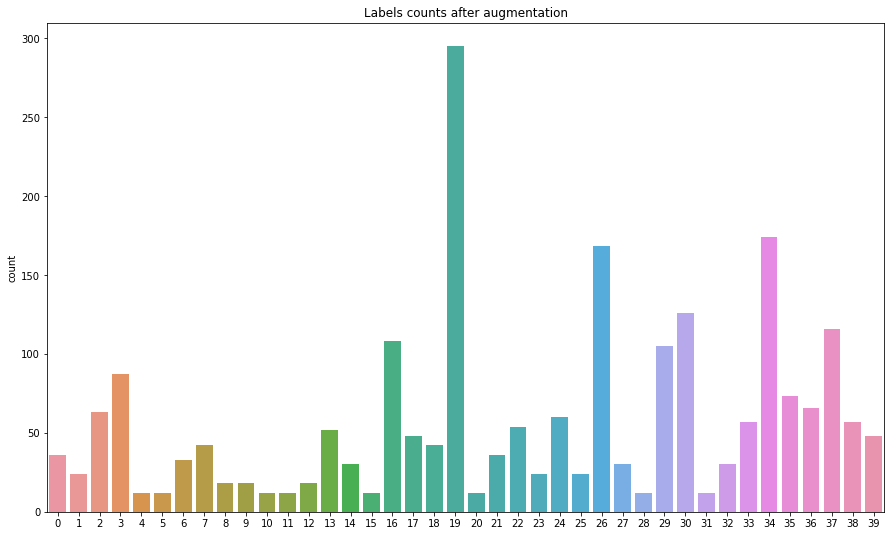

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(labels)
plt.title('Labels counts after augmentation')

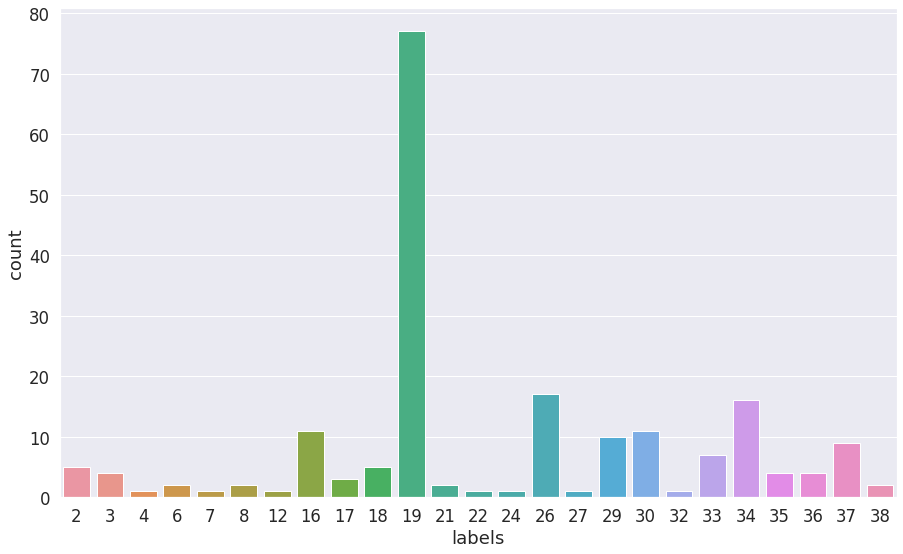

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(data=prevoius_results, x="labels")

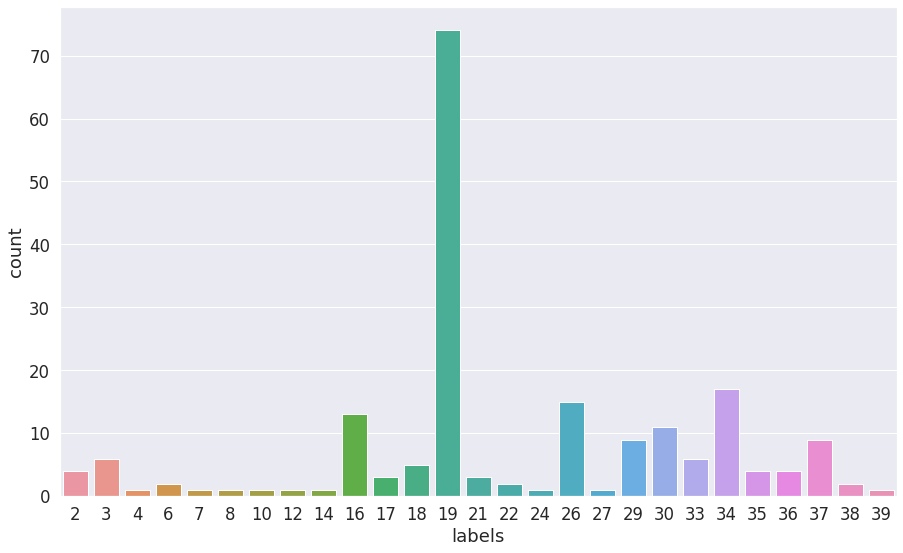

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(data=last_results, x="labels")

In [ ]:
test_data['intent'] = prevoius_results['intent']

In [ ]:
for i in test_data.values:
  print(i)

['كان إعداد الإصابات ف مصر' 'infected cases']
['اعداد المصابين الان في مصر بفيرس كورونا' 'infected cases']
['اسرائيل' 'infected cases']
['هل تم التوصل لمصل للوقاية من كرونا' 'treatment']
['الحالات في امريكا' 'infected cases']
['عدد الحالات في محافظة المنيا في جمهورية مصر العربية كان النهاردة'
 'infected cases']
['دى اجابه خطأ' 'nothing identified']
['إعداد المصابين فى مصر اليوم' 'infected cases']
['متا تنتهي كرونا' 'the evolution of the virus']
['عايز أعرف كم واحد مصاب في مصر وفي الصين' 'infected cases']
['كم عدد الحالات في مصر والاردن' 'infected cases']
['وقطر' 'infected cases']
['لو حد بيكح من غير سخونية  يعمل ايه' 'nothing identified']
['اهلا نميسه' 'greeting']
['كان فين مستشفيات العزل في مصر' 'business location']
['فى مصر' 'infected cases']
['اعداد المصابين امس' 'infected cases']
['تطور العلاج' 'treatment']
['عدد الحالات في هولندا' 'infected cases']
['كم عدد الاصابات في مصر اليوم' 'infected cases']
['عدد حالات الكورونا في الاردن' 'infected cases']
['الحالات في مصر والسعوديه وصلت لك

In [ ]:
test_data[test_data['text'] == 'وصلنا للذروه ولا لسه؟']

,text,intent
index,,
54,وصلنا للذروه ولا لسه؟,nothing identified


In [ ]:
misclassified = prevoius_results[prevoius_results['labels'] != last_results['labels']]
misclassified['case'] = test_data[prevoius_results['labels'] != last_results['labels']]['text']
misclassified

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,intent,labels,case
12,12,nothing identified,26,لو حد بيكح من غير سخونية يعمل ايه
22,22,infected cases,19,هنا على اسم مصر وصلت بكام
31,31,precautions,29,كيف نعالج الكرونا
46,46,about corona virus,2,تحليل فيروس كورونا
50,50,nothing identified,26,حظر التجول
91,91,nothing identified,26,ممكن
97,97,reviews,30,نعم ، بالتأكيد 👍
112,112,spoken languages,32,بعربي
138,138,muzzle/mask,24,اهلا أرجو الرد هل موضوع كورونا مفترض أن يمتد ...
140,140,precautions,29,ايه الاكلات اللي اعملها لولادي عشان تمنع العدوي


In [1]:
####

In [ ]:
prevoius_results.loc[97]

index      97
intent    yes
labels     30
Name: 97, dtype: object

In [ ]:
prevoius_results.loc[168]

index            168
intent    laboratory
labels            34
Name: 168, dtype: object

In [ ]:
prevoius_results.drop('labels',axis=1).to_csv('habdmodel.csv', index=False)

# Preprocessing

In [ ]:
char2index = {' ': 1,'ء': 3,'آ': 4,'أ': 5,'ؤ': 6,'إ': 7,'ئ': 8,'ا': 9,'ب': 10,'ة': 11,'ت': 12,'ث': 13,'ج': 14,'ح': 15,'خ': 16,'د': 17,'ذ': 18,'ر': 19,'ز': 20,'س': 21,'ش': 22,'ص': 23,'ض': 24,'ط': 25,'ظ': 26,'ع': 27,'غ': 28,'ف': 29,'ق': 30,'ك': 31,'ل': 32,'م': 33,'ن': 34,'ه': 35,'و': 36,'ى': 37,'ي': 38,'ڤ':39}

In [ ]:
stop_file =  my_file = open("/content/drive/MyDrive/dataset/arabic_stop_words.txt", "r")
stopwords = stop_file.read().split('\n')

In [ ]:
def clean_text(string):
  string = araby.strip_tashkeel(string)
  #string = araby.normalize_alef(string)
  string = araby.normalize_teh(string)
  #string = araby.normalize_hamza(string)
  string = string = re.sub(r'ء','ا',string)
  string = re.sub(r'[0123456789]*','',string)
  string = re.sub(r'[٠,١,٢,٣,٤,٥,٦,٧,٨,٩,٪,٫,٬,٭,ٮ,ٯ,ٰ,ٱ,ٲ,ٳ,ٴ,ٵ,ٶ,ٷ,ٸ,ٹ,ٺ,ٻ,ټ,ٽ,پ,ٿ,ڀ,ځ,ڂ,ڃ,ڄ,څ,چ,ڇ,ڈ,ډ,ڊ,ڋ,ڌ,ڍ,ڎ,ڏ,ڐ,ڑ,ڒ,ړ,ڔ,ڕ,ږ,ڗ,ژ,ڙ,ښ,ڛ,ڜ,ڝ,ڞ,ڟ,ڠ,ڡ,ڢ,ڣ,ڤ,ڥ,ڦ,ڧ,ڨ,ک,ڪ,ګ,ڬ,ڭ,ڮ,گ,ڰ,ڱ,ڲ,ڳ,ڴ,ڵ,ڶ,ڷ,ڸ,ڹ,ں,ڻ,ڼ,ڽ,ھ,ڿ,ۀ,ہ,ۂ,ۃ,ۄ,ۅ,ۆ,ۇ,ۈ,ۉ,ۊ,ۋ,ی,ۍ,ێ,ۏ,ې,ۑ,ے,ۓ,۔,ە,ۖ,ۗ,ۘ,ۙ,ۚ,ۛ,ۜ,۝,۞,۟,۠,ۡ,ۢ,ۣ,ۤ,ۥ,ۦ,ۧ,ۨ,۩,۪,۫,۬,ۭ,ۮ,ۯ,۰,۱,۲,۳,۴,۵,۶,۷,۸,۹,]*','',string)
  string = re.sub(r'[…"%–_!()*-.ـ:=o«»;\[\]؛,،~?؟\u200f\ufeffـ\u200d\u200c\uf020\uf03a\uf02d\uf02e]*','',string)
  string = re.sub(r'[abcdefghijklmnopqrstuvwx×yzABCDEFGHIJKLMNOPQRSTUVWXYZ]*','',string)
  string = re.sub(r"\s+$", '',string)
  string = re.sub(r"^\s+", '',string)
  string = demoji.replace(string)
  return string	

In [ ]:
	
from snowballstemmer import stemmer

def preprocess_text(text,tokenizer=wordpunct_tokenize,stemmer = stemmer('arabic'),stop_words=stopwords):
  print('old string:',text)

  # (1) Cleaning text
  text = clean_text(text)

  # (2) Tokenizing
  text = tokenizer(text)
  
  # (3) Removing stopwords
  text = [word for word in text if word not in stop_words]

  
  # (4) Stemming
  text = [stemmer.stemWord(word) for word in text]
  text = ' '.join(text)
  # (5) Removing duplicate chars
  #text = ["".join(dict.fromkeys(word)) for word in text]

  print('new string:',text)

  return text


In [ ]:
def digitize(string):
  return [char2index[char] for word in string for char in word]

In [ ]:
# # tokenized_matrix = pad_sequences(data['text'].apply(lambda x: digitize(preprocess_text(x))).values,padding='post', value=0, maxlen = 50)
# # tokenized_matrix
# tokenized_matrix = data['text'].apply(lambda x: preprocess_text(x))
# tokenized_matrix

0                          [شفي, عزل, مصر, وما, هى, مكن]
1                                                  [خصم]
2                                        [متي, نهي, كور]
3                                              [ان, اسف]
4                                        [كام, وفي, هرد]
                             ...                        
786                                                [اهل]
787                                                [بلح]
788                                                [حال]
789                                      [نهى, يرس, كور]
790    [مكن, عرف, يتم, نها, يرس, كرو, وهل, تثر, رفع, ...
Name: text, Length: 791, dtype: object

In [ ]:
_ = data['text'].apply(preprocess_text)

old string: كم عدد مستشفيات العزل فى مصر وما هى اماكنها
new string: مستشفيا عزل مصر وما هي اما
old string: ومخاصمك
new string: مخاصم
old string: متي ينتهي كورونا؟
new string: مت ينته كور
old string: انا اسف
new string: انا اسف
old string: كام عدد الوفيات النهارده
new string: كام الوف نهارده
old string: عارفه يا نميسا انا عندى ليكى عريس
new string: عارف يا نميس انا عندي ليكي عريس
old string: ما هي مرض كرونا والعلاج وطرق الوقابه
new string: مرض كرو والعلاج طرق وقابه
old string: عدد الاصابات كرونه فى مصر
new string: اصاب كرون مصر
old string: والدي تعبان شويه وصدره بيوجعه مش عارف ده دور برد ولا كورونا ؟
new string: والد تعبان شوي صدر يوجع مش عارف ده دور برد كور
old string: عدد الوفيات النهاردة كان في إيطاليا
new string: الوف نهارده ايطالي
old string: هل الفيروس كورنا يبقي علي. الملابس. والاحذية
new string: فيروس كور يبق ملابس والاحذ
old string: التقرير النهارده كام
new string: تقرير نهارده كام
old string: طاهر إزاي البيت والملابس
new string: طاهر ازا بيت والملابس
old string: هل مادة الفيني

# New Preprocessing

In [ ]:
# import torch
# from transformers import XLMRobertaTokenizer

# # Download the tokenizer for the XLM-Robert `base` model.
# tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base" )

In [ ]:
# # Retrieve the full list of tokens.
# all_tokens = list(tokenizer.get_vocab().keys())

# print('The vocabulary contains {:,} tokens.'.format(len(all_tokens)))

In [ ]:
# from transformers import BertTokenizer

# # Download the tokenizer for the XLM-Robert `base` model.
# bert_tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

In [ ]:
# example_sentence = 'برجاء ايقا فمتا الهراء'

# # Tokenize with SentencePiece
# xlmr_tokens = tokenizer.tokenize(example_sentence)

# # Tokenize with WordPiece
# bert_tokens = bert_tokenizer.tokenize(example_sentence)

In [ ]:
# from transformers import XLMRobertaForSequenceClassification
# # Load the tokenizer. 
# xlmr_tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base" )
# # Load the model.
# xlmr_model = XLMRobertaForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=40)

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
# Load the tokenizer.
tokenizer = BertTokenizer.from_pretrained("asafaya/bert-base-arabic")
# Load the model.


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in data['text']:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 50,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', data['text'][0])
print('Token IDs:', input_ids[0])

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size],generator=torch.Generator().manual_seed(87))

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained("asafaya/bert-base-arabic", num_labels = 40)

# Tell pytorch to run this model on the GPU.
_=model.cuda()

Some weights of the model checkpoint at asafaya/bert-base-arabic were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-ar

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (32000, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
# import json
# pd.read_json('/content/drive/MyDrive/model/config.json')

In [ ]:
import random
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        #model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels).values()

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.

        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels).values()
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of     57.    Elapsed: 0:00:12.

  Average training loss: 2.76
  Training epcoh took: 0:00:16

Running Validation...
  Accuracy: 0.53
  Validation Loss: 2.10
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...
  Batch    40  of     57.    Elapsed: 0:00:12.

  Average training loss: 1.51
  Training epcoh took: 0:00:17

Running Validation...
  Accuracy: 0.79
  Validation Loss: 1.25
  Validation took: 0:00:01

======== Epoch 3 / 4 ========
Training...
  Batch    40  of     57.    Elapsed: 0:00:12.

  Average training loss: 0.79
  Training epcoh took: 0:00:17

Running Validation...
  Accuracy: 0.82
  Validation Loss: 0.93
  Validation took: 0:00:01

======== Epoch 4 / 4 ========
Training...
  Batch    40  of     57.    Elapsed: 0:00:12.

  Average training loss: 0.49
  Training epcoh took: 0:00:16

Running Validation...
  Accuracy: 0.85
  Validation Loss: 0.80
  Validation took: 0:00:01

Training complete!
Total tr

In [ ]:

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,2.76,2.10,0.53,0:00:16,0:00:01
2,1.51,1.25,0.79,0:00:17,0:00:01
3,0.79,0.93,0.82,0:00:17,0:00:01
4,0.49,0.80,0.85,0:00:16,0:00:01


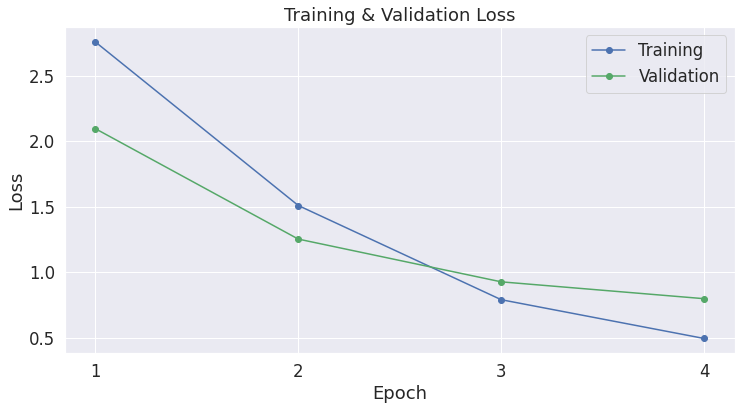

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/model_4.bin')

# Modelling

In [ ]:
X_train, X_valid , y_train, y_valid = train_test_split(tokenized_matrix, labels, test_size = 0.10, random_state = 3)

In [ ]:
# def define_model(length, vocab_size,embedding_dim=100,dropout_prob=0.2):
#   # channel 1
#   inputs1 = Input(shape=(length,))
#   embedding1 = Embedding(vocab_size, embedding_dim)(inputs1)
#   conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
#   BN1 = BatchNormalization()(conv1)
#   drop1 = Dropout(dropout_prob)(BN1)
#   pool1 = MaxPooling1D(pool_size=2)(drop1)
#   flat1 = Flatten()(pool1)
#   # channel 2
#   inputs2 = Input(shape=(length,))
#   embedding2 = Embedding(vocab_size, embedding_dim)(inputs2)
#   conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
#   BN2 = BatchNormalization()(conv2)
#   drop2 = Dropout(dropout_prob)(BN2)
#   pool2 = MaxPooling1D(pool_size=2)(drop2)
#   flat2 = Flatten()(pool2)
#   # channel 3
#   inputs3 = Input(shape=(length,))
#   embedding3 = Embedding(vocab_size, embedding_dim)(inputs3)
#   conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
#   BN3 = BatchNormalization()(conv3)
#   drop3 = Dropout(dropout_prob)(BN3)
#   pool3 = MaxPooling1D(pool_size=2)(drop3)
#   flat3 = Flatten()(pool3)
#   # merge
#   merged = concatenate([flat1, flat2, flat3])
#   # interpretation
#   dense1 = Dense(64, activation='relu')(merged)
#   outputs = Dense(40, activation='softmax')(dense1)
#   model = Model(inputs=[inputs1,inputs2,inputs3], outputs=outputs)
#   # compile
#   model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   # summarize
#   return model


In [ ]:
# class TransformerBlock(layers.Layer):
#     def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
#         super(TransformerBlock, self).__init__()
#         self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
#         self.ffn = keras.Sequential(
#             [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
#         )
#         self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
#         self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
#         self.dropout1 = layers.Dropout(rate)
#         self.dropout2 = layers.Dropout(rate)

#     def call(self, inputs, training):
#         attn_output = self.att(inputs, inputs)
#         attn_output = self.dropout1(attn_output, training=training)
#         out1 = self.layernorm1(inputs + attn_output)
#         ffn_output = self.ffn(out1)
#         ffn_output = self.dropout2(ffn_output, training=training)
#         return self.layernorm2(out1 + ffn_output)

# class TokenAndPositionEmbedding(layers.Layer):
#     def __init__(self, maxlen, vocab_size, embed_dim):
#         super(TokenAndPositionEmbedding, self).__init__()
#         self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
#         self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

#     def call(self, x):
#         maxlen = tf.shape(x)[-1]
#         positions = tf.range(start=0, limit=maxlen, delta=1)
#         positions = self.pos_emb(positions)
#         x = self.token_emb(x)
#         return x + positions

In [ ]:
def define_model(length, vocab_size,embed_dim=100,num_heads=3,ff_dim=64,dropout_prob=0.1):
  inputs = layers.Input(shape=(length,))
  embedding_layer = Embeddinginput_dim =len(my_vocab), output_dim=embed_dim,weights=[my_vocab.embedding_matrix], input_length=length,trainable=False) #TokenAndPositionEmbedding(length, vocab_size, embed_dim)
  x = embedding_layer(inputs)
  transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
  x = transformer_block(x)
  x = layers.GlobalAveragePooling1D()(x)
  x = layers.Dropout(dropout_prob)(x)
  x = layers.Dense(128, activation="relu")(x)
  x = layers.Dropout(dropout_prob)(x)
  outputs = layers.Dense(40, activation="softmax")(x)

  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
model = define_model(50,100)
model.summary()

In [ ]:
# callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_delta=0.0001, min_lr=0.0001)]
# callbacks += [tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/dataset/final_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')]
# callbacks += [
#     tf.keras.callbacks.EarlyStopping(
#         monitor='val_accuracy',
#         patience=5)]

In [ ]:
model.fit(X_train,y_train,validation_data= (X_valid, y_valid),epochs=100, batch_size=16)

# Testing

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/dataset/test.csv',index_col=0)
test_data

,text
index,
0,كان إعداد الإصابات ف مصر
1,اعداد المصابين الان في مصر بفيرس كورونا
2,اسرائيل
3,هل تم التوصل لمصل للوقاية من كرونا
4,الحالات في امريكا
...,...
193,نميسه
194,انتي مرتبطة يا نميسة ؟
195,اعداد المصابين فى بورسعيد


In [ ]:
model = BertForSequenceClassification.from_pretrained("asafaya/bert-base-arabic", num_labels = 40)
#checkpoint = torch.load('/content/drive/MyDrive/model/pytorch_model.bin')
if torch.device("cpu") != device:
  checkpoint = torch.load('/content/drive/MyDrive/model/pytorch_model.bin')
else:
  checkpoint = torch.load('/content/drive/MyDrive/model/pytorch_model.bin', map_location='cpu')
model.load_state_dict(checkpoint)
model = model.to(device)

Some weights of the model checkpoint at asafaya/bert-base-arabic were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-ar

In [ ]:
! transformers-cli repo create machathonmodel

In [ ]:
!sudo apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!git config --global user.email "moaazzaki1999@gmail.com"
!git config --global user.name "MoaazZaki"

In [ ]:
model.push_to_hub("machathonmodel")

In [ ]:
# Create sentence and label lists
sentences = test_data.text.values
#del labels
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 50,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
#labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 1  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  #label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(np.argmax(logits, axis=1)[0])
  #true_labels.append(label_ids)

print('    DONE.')

    DONE.


In [ ]:
len(predictions)

198

In [ ]:
pd.DataFrame(le.inverse_transform(predictions)).reset_index().rename(columns={0:'intent'}).to_csv('model9.csv', index=False)

In [ ]:
#.rename(columns={0:'intent'}

In [ ]:
# def getResults(data):
#   test = BERTDataset(text=test_data['text'].to_list(),target=np.random.randint(0,39),model_name=model_name,max_len=max_len,label_map=label_map)
#   y_pred =trainer.predict(test_dataset=test)
#   return np.argmax(model.predict(x_test),axis=1) 

In [ ]:
# trainer.save_model('/content/drive/MyDrive/model')

# HELPERS

## Helper Preprocessing

In [ ]:
def clean_text(string):
  """
  Sources 
  ----------
  https://stackabuse.com/using-regex-for-text-manipulation-in-python/
  https://lionbridge.ai/articles/using-natural-language-processing-for-spam-detection-in-emails/
  
  Description
  -----------
  clean text by handling unneeded words

  Parameters
  ----------
  string : str
      string to be processed

  Returns
  -------
  str
      cleaned string
  """
  string = str(string) if type(string) != type('aa') else string
  string = string.lower()
  string = re.sub(r"http\S+", "", string)
  string = re.sub(r"\W", " ", string, flags=re.I)
  string = re.sub(r"[^A-Za-z0-9]", " ", string)
  string = re.sub(r"\'s", " is ", string)
  string = re.sub(r"\'ve", " have ", string)
  string = re.sub(r"can't", "cannot ", string)
  string = re.sub(r"n't", " not ", string)
  string = re.sub(r"I'm", "I am", string)
  string = re.sub(r"\'re", " are ", string)
  string = re.sub(r"\'d", " would ", string)
  string = re.sub(r"\'ll", " will ", string)
  string = re.sub(r"e-mail", "email", string)
  string = re.sub(r" usa ", " america ", string)
  string = re.sub(r" uk ", " england ", string)
  string = re.sub(r"\s+"," ", string, flags = re.I)
  string = string[7:] if re.search(r"^subject", string) else string
  string = re.sub(r"^\s+", "", string)
  string = string[7:] if re.search(r"^re", string) else string
  string = re.sub(r"^\s+", "", string)
  string = re.sub(r"\s+$", "", string)
  string = re.sub(r"\s+[a-zA-Z]\s+", " ", string)

  return string


In [ ]:
def tokenizer(text):
  """
  Sources 
  ----------
  
  Description
  -----------
  Converts text to set of encoded words

  Parameters
  ----------
  text : pd.Series
      data to be processed

  Returns
  -------
  pd.Series
      processed data
  """

  tk = Tokenizer(num_words=TOKENIZER_WORD_NUM)
  tk.fit_on_texts(text)
  return pd.Series(tk.texts_to_sequences(text))

In [ ]:
def preprocess_text(text,tokenizer=word_tokenize,stops_remove=True,stemmer = SnowballStemmer('english'),stop_words=stopwords.words('english')):
  """
  Sources 
  ----------
  
  Description
  -----------
  Perform the whole preprocessing pipeline for a given text

  Parameters
  ----------
  text : str
      text to be processed

  tokenizer: function (optional)
      used tokenizer

  stemmer: object (optional)
      used stemmer

  stops_remove: list (optional)
      stop words to be removed

  

  Returns
  -------
  str
      processed string
  """
  
  # (1) Cleaning text
  text = clean_text(text)

  # (2) Tokenizing
  text = tokenizer(text)
  
  # (3) Removing stopwords
  text = [word for word in text if word not in stop_words]

  # (4) Stemming
  text = [stemmer.stem(word) for word in text]

  return text


In [ ]:
def preprocess_df(df,X,y,tokenizer=word_tokenize,stops_remove=True,stemmer = SnowballStemmer('english'),stop_words=stopwords.words('english')):
  """
  Sources 
  ----------
  
  Description
  -----------
  Perform the whole preprocessing pipeline for a given dataframe

  Parameters
  ----------
  text : pd.DataFrame
      dataframe to be processed

  tokenizer: function (optional)
      used tokenizer

  stemmer: object (optional)
      used stemmer

  stops_remove: list (optional)
      stop words to be removed

  

  Returns
  -------
  pd.DataFrame
      processed dataframe
  """
  df_unique = df.drop_duplicates()
  df_ = pd.DataFrame(df_unique[X].apply(lambda x: preprocess_text(x,tokenizer=tokenizer,stops_remove=stops_remove,stemmer=stemmer,stop_words=stop_words)))  
  df_[y] = df_unique[y]
  return df_

In [ ]:
def prepare_data(df,X,length_col,vocab):
  # (1) Encoding words
  df[X] = df[X].apply(lambda sentence: [vocab[word] for word in sentence])

  # (2) Padding/Truncating rows
  length_stats = df[length_col].describe()
  common_length = length_stats.loc['75%']
  max_length = length_stats.loc['max']
  picked_length = int( max_length if common_length / max_length >= 0.5 else common_length)

  df[X] = df[X].apply(lambda sentence: sentence + [0]*(picked_length-len(sentence)) if len(sentence) < common_length else sentence[:picked_length])

# Helper Feature Extraction

In [ ]:
class Vocabulary:
  """
  Description
  -----------
  - Keeps the words in dataset with count
  - Gives a token for each word
  """

  def __init__(self,max_vocab_size=-1):
    """  
    Description
    -----------
      Initialize vocabulary 

    Parameters
    ----------
    max_vocab_size : int
      maximum vocabulary size
    """
    # Members
    self.word_to_index = dict()
    self.index_to_word = dict()
    self.word_count = pd.Series(dtype=np.int32)
    self.unique_word_count = pd.Series(dtype=np.int32)
    self.prev_sentence_index = -1
    self.vocab_size = 0
    
    self.max_vocab_size = max_vocab_size

    self.word_to_index[' '] = self.vocab_size
    self.index_to_word[self.vocab_size] = '<empty>'
    self.vocab_size += 1
    self.word_count.loc['<empty>'] = GAMMA

    self.word_to_index['<unkown>'] = self.vocab_size
    self.index_to_word[self.vocab_size] = '<unkown>'
    self.vocab_size += 1
    self.word_count.loc['<unkown>'] = GAMMA

    self.tf_dict = {}

  def __len__(self):
    """
    Description
    -----------
      Get the size of vocabulary
    """
    return self.vocab_size

  def __getitem__(self,key):
    """
    Description
    -----------
      Get the size of vocabulary

    Parameters
    ----------
    key : int/str
      Index/word to get its corresponding word/index

    Returns
    -------
    int/str
      Query
    """

    # If key is string
    if type(key) == type('ss'):
      query = 1
      try: 
        query = self.word_to_index[key]
      except:
        pass
      return query
    # If key is integer
    elif type(key) == type(50):
      query = 0
      try:
        query = self.index_to_word[key]
      except:
        raise KeyError('Index out of range')
      return query
    # If key is an unknown type
    else:
      raise KeyError("Invalid key type, key must be string or integer")


  def add_word(self,word,sentence_index=0,sentence_len=1,calculate_tf = False):
    """
    Description
    -----------
      Add word to the vocabulary

    Parameters
    ----------
    word : str
      Word to be added

    Returns
    -------
    bool
      The state of adding the word (success/fail)
    """   
    
    try:
      self.word_count.loc[word] += 1
      if self.prev_sentence_index != sentence_index:
        self.unique_word_count[word] += 1
        self.prev_sentence_index = sentence_index
      if calculate_tf:
        try:
          self.tf_dict[word][sentence_index] += 1/(sentence_len+GAMMA)
        except:
          self.tf_dict[word][sentence_index] = 1/(sentence_len+GAMMA)
    except:
      # If the vocab reached max size
      if self.vocab_size == self.max_vocab_size:
        return False
      # Adding new word
      self.word_count.loc[word] = 1
      self.unique_word_count.loc[word] = 1
      self.prev_sentence_index = sentence_index
      self.word_to_index[word] = self.vocab_size
      self.index_to_word[self.vocab_size] = word
      self.vocab_size += 1
      if calculate_tf:
        self.tf_dict[word] = {sentence_index:1/(sentence_len+GAMMA)}
    
    return True

  def create_vocab(self,df,X='Body',calculate_tfidf = False):
    for index,sentence in enumerate(df[X]):
      for word in sentence:
        my_vocab.add_word(word,index,len(sentence),calculate_tfidf)
    
    if calculate_tfidf:
      self.create_tfidf_matrix(df)

  def get_vocab_words(self):
    return self.index_to_word.values()

  def create_tfidf_matrix(self,df,X='Body'):
    self.tfidf_matrix = np.empty([len(df),self.vocab_size],dtype=np.float64)

    for word,dic in self.tf_dict.items():
      for index,word_tf in dic.items():
        idf = np.log(len(df) / self.unique_word_count.loc[word])
        self.tfidf_matrix[index,self.word_to_index[word]] = word_tf * idf

  
  def add_vectorizer(self,vectorizer):
    """
    Description
    -----------
      Add vectorized object

    Parameters
    ----------
    word : str
      Word to be added

    Returns
    -------
    bool
      The state of adding the word (success/fail)
    """
    self.vectorizer = vectorizer

  def word_to_vector(self,word):
    vector = np.zeros(EMBEDDING_DIM)
    try:
      vector = self.vectorizer[word]
    except:
      pass
    return vector

  def create_embedding_matrix(self):
    self.embedding_matrix = np.empty([self.vocab_size,EMBEDDING_DIM],dtype=np.float64)
    for index,word in self.index_to_word.items():
      self.embedding_matrix[index] = self.word_to_vector(word)


# Other Data

In [ ]:
# Read, then decode for py2 compat.
def extract_data(path, thresh = 70, on_shatrs = False):
  global vocab
  
  text = ""
  
  X = []
  y = []
    
  t = open(path, 'r').read()
  #t = araby.strip_tashkeel(t)
  # remove some exteranous chars 
  execluded = '!()*-ـ.:=o[]«»;؛,،~?؟\u200f\ufeffـ'
  out = ""
  
  for char in t:
    #if char not in execluded:
    out += char
      
  text += out
  baits = out.split('\n')
  for line in baits:
    if len(line) <= 1:
      continue
    label, bait = line.split(' ', 1)
    label = int(label)

    bait  = bait.strip()
    if on_shatrs:
      shatrs = bait.split('#')
      for shatr in shatrs:
        X.append(shatr.strip())
        y.append(label)
    else:
      X.append(bait.strip())
      y.append(label)
  
  #create the vocab 
  vocab = sorted(set(' '.join(X)))  
  
  #shuffle the data 
  X, y = shuffle(X, y)
  return X, y

In [ ]:
from sklearn.utils import shuffle


In [ ]:
X, y = extract_data("final_baits/test.txt", on_shatrs=False)

In [ ]:
long_data = pd.DataFrame(X).rename(columns={0:'data'})
long_data['labels'] = y
long_data

,data,labels
0,بِكُلِّ تَقديسَةٍ يُرَدِّدُها # فيكَ النَصاري ...,4
1,تعالَت ذاتُ مَولايَ # عَن الإِدراكِ بِاللَحظِ,12
2,بِوادي لَكَ بِالشَوق الَّذي # في فُؤادي لا تدَ...,7
3,ومن ألفناه كان الموت فرّقنا # لا يمنع الموت جي...,8
4,واسأل الرحمن لي في حاجتي # التي في النفس منها ...,7
...,...,...
8311,دِيَماً في كُلِّ يَومٍ وَوَبلاً # وَاِغتِباقاً...,5
8312,وَلقدْ أَنْذَرْتُهُ فَرَأَيْتُهُ # جَاهِلِيَّا...,9
8313,في كفّه نبعةٌ مُوَتَّرة # يهزج ابياضًها ويهتضِبُ,4
8314,كَأَنَّهُم لِلعُيون تَبصرة # كَأَنَّهُم في الق...,4


In [ ]:
ver_long_data = pd.concat([data,long_data],ignore_index=True)
ver_long_data = ver_long_data.drop(labels=["labels_text"], axis=1)
ver_long_data = ver_long_data.drop_duplicates()
ver_long_data = ver_long_data.reset_index().drop(labels=["index"], axis=1)

In [ ]:
ver_long_data

,labels,data
0,8,أَنا الفقير وباللَه العظيم غني # لئن فقدتك في ...
1,10,وَلوعاً بِيُمنَى نَمْنَمَتْها حَدِيقَةٌ # نَزْ...
2,11,فيا منْ لم أزلْ أحظى لديه # بفضلٍ جامعٍ بابَ ا...
3,9,وَسَلامٌ عَلَى ضَرِيحِكَ مَا أَهْ # دَتْ شَذَا...
4,8,أمِنْتُ فقري لما قُلتُ عن ثِقَةٍ # أنْ لا جواد...
...,...,...
1471171,0,أَثْقَلَنِي بِالْبِرِّ حَتَّى لَقَدْ # أَعْجِز...
1471172,8,إلا لحالَيْن فَقْدِ العقلِ والدينِ # لو رام ذل...
1471173,7,حارَبوا الجَهلَ وَكانوا قَبلَنا # في دُجى عَمي...
1471174,9,فَقَطَفْتُ الشَّقِيقَ منْ وجْهِهِ # وَاغْتَبَق...
